# Import packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# check version (example)
print(f"NumPy version: {np.__version__}")

NumPy version: 1.16.2


## Link colab notebook to drive folder

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('drive/My Drive/') #main folder of Google Drive account

# Creating a DataFrame

In [2]:
# create a dictionary
data = {"name" : ["Bill","Tom","Tim","John","Alex","Vanessa","Kate","Jane", "Mareli","Scarlet","Aryanna","Amira","Aisha","Luca","Franco","Christian"],      
        "score": [90,80,85,75,95,60,65,85,95,90,70,80,80,60,75,40],      
        "sport": ["Wrestling","Skiing","Skiing","Skiing",np.nan,"Wrestling","Football","Football","Wrestling","Football","Football","Skiing","Football","Wrestling","Football","Football"],      
        "sex"  : ["M","M","M","M","F","F","F","F","F","F","F","F","F","M","M","M"]
        }

# show the dictionary
print(data)

{'name': ['Bill', 'Tom', 'Tim', 'John', 'Alex', 'Vanessa', 'Kate', 'Jane', 'Mareli', 'Scarlet', 'Aryanna', 'Amira', 'Aisha', 'Luca', 'Franco', 'Christian'], 'score': [90, 80, 85, 75, 95, 60, 65, 85, 95, 90, 70, 80, 80, 60, 75, 40], 'sport': ['Wrestling', 'Skiing', 'Skiing', 'Skiing', nan, 'Wrestling', 'Football', 'Football', 'Wrestling', 'Football', 'Football', 'Skiing', 'Football', 'Wrestling', 'Football', 'Football'], 'sex': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M']}


--> not very legible

To explore and visualize data, it is common practice to use a DataFrame.
A DataFrame is a 2-dimensional data structure composed of rows and columns, similar to a spreadsheet. 

In [ ]:
# convert 'data' to a dataframe
df = pd.DataFrame(data)

# show the dataframe
df

,name,score,sport,sex
0,Bill,90,Wrestling,M
1,Tom,80,Skiing,M
2,Tim,85,Skiing,M
3,John,75,Skiing,M
4,Alex,95,NaN,F
5,Vanessa,60,Wrestling,F
6,Kate,65,Football,F
7,Jane,85,Football,F
8,Mareli,95,Wrestling,F
9,Scarlet,90,Football,F


# Exploring a DataFrame

Check the shape of your dataframe:

In [ ]:
df.shape
# the output corresponds to (number_of_rows, number_of_columns)

(16, 4)

If your DataFrame is very large, it might be impractical to look at all the rows at once.

In [ ]:
# display the first 5 rows (default)
df.head()

,name,score,sport,sex
0,Bill,90,Wrestling,M
1,Tom,80,Skiing,M
2,Tim,85,Skiing,M
3,John,75,Skiing,M
4,Alex,95,NaN,F


In [ ]:
# display the first n rows (here, n = 3)
df.head(n = 3)

,name,score,sport,sex
0,Bill,90,Wrestling,M
1,Tom,80,Skiing,M
2,Tim,85,Skiing,M


In [ ]:
# similarly, you can  display the last few rows
df.tail() 

# or for example:
# df.tail(n = 3)

,name,score,sport,sex
11,Amira,80,Skiing,F
12,Aisha,80,Football,F
13,Luca,60,Wrestling,M
14,Franco,75,Football,M
15,Christian,40,Football,M


You can display all the columns and their types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    16 non-null     object
 1   score   16 non-null     int64 
 2   sport   15 non-null     object
 3   sex     16 non-null     object
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


To get some basic statistics on your data:

In [ ]:
df.describe()

,score
count,16.00000
mean,76.56250
std,14.80076
min,40.00000
25%,68.75000
50%,80.00000
75%,86.25000
max,95.00000


`.describe()` only analyzes numeric columns by default, but you can provide other data types if you use the include parameter:

In [ ]:
df.describe(include = object)

,name,sport,sex
count,16,15,16
unique,16,3,2
top,Franco,Football,F
freq,1,7,9


You can have specific questions on your dataset:

In [ ]:
# how many people play each sport
df["sport"].value_counts()

Football     7
Skiing       4
Wrestling    4
Name: sport, dtype: int64

In [ ]:
# what is the minimum score for Football?
df.loc[df["sport"] == "Football", "score"].min()

40

In [ ]:
# the maximum?
df.loc[df["sport"] == "Football", "score"].max()

90

In [ ]:
# you can also show both at the same time:
df.loc[df["sport"] == "Football", "score"].agg(("min", "max"))

min    40
max    90
Name: score, dtype: int64

We might want to add data to our DataFrame, for example the ages of the players:

In [ ]:
import random

In [ ]:
# get the number of players we have in our dataframe
nb_players = df.shape[0] 

# we want to generate (nb_players) ages randomly
# these ages are between 10 and 30
list_ages = random.sample(range(10, 30), nb_players)
print(list_ages)

# we want to add this list to our dataframe in a column called "age"
df["age"] = list_ages
df

[24, 22, 17, 25, 15, 10, 21, 20, 13, 26, 16, 29, 27, 23, 19, 14]


,name,score,sport,sex,age
0,Bill,90,Wrestling,M,24
1,Tom,80,Skiing,M,22
2,Tim,85,Skiing,M,17
3,John,75,Skiing,M,25
4,Alex,95,NaN,F,15
5,Vanessa,60,Wrestling,F,10
6,Kate,65,Football,F,21
7,Jane,85,Football,F,20
8,Mareli,95,Wrestling,F,13
9,Scarlet,90,Football,F,26


# Saving and loading a DataFrame

To save a DataFrame:

In [ ]:
df.to_csv("sports.csv")

To load a DataFrame from a file:

In [ ]:
# let's say you deleted a column from your original dataframe:
df = df.drop(["score"], axis=1)
df

,name,sport,sex,age
0,Bill,Wrestling,M,24
1,Tom,Skiing,M,22
2,Tim,Skiing,M,17
3,John,Skiing,M,25
4,Alex,NaN,F,15
5,Vanessa,Wrestling,F,10
6,Kate,Football,F,21
7,Jane,Football,F,20
8,Mareli,Wrestling,F,13
9,Scarlet,Football,F,26


In [ ]:
# but you want to use the original dataframe again. you can load it from a .csv file, using
df = pd.read_csv("sports.csv", index_col=0)
df

,name,score,sport,sex,age
0,Bill,90,Wrestling,M,24
1,Tom,80,Skiing,M,22
2,Tim,85,Skiing,M,17
3,John,75,Skiing,M,25
4,Alex,95,NaN,F,15
5,Vanessa,60,Wrestling,F,10
6,Kate,65,Football,F,21
7,Jane,85,Football,F,20
8,Mareli,95,Wrestling,F,13
9,Scarlet,90,Football,F,26


Try using the same command without `index_col=0` to see what changes:

In [ ]:
df2 = pd.read_csv("sports.csv")
df2

,Unnamed: 0,name,score,sport,sex,age
0,0,Bill,90,Wrestling,M,24
1,1,Tom,80,Skiing,M,22
2,2,Tim,85,Skiing,M,17
3,3,John,75,Skiing,M,25
4,4,Alex,95,NaN,F,15
5,5,Vanessa,60,Wrestling,F,10
6,6,Kate,65,Football,F,21
7,7,Jane,85,Football,F,20
8,8,Mareli,95,Wrestling,F,13
9,9,Scarlet,90,Football,F,26


# Cleaning data

There are null values in our DataFrame. 
You can ignore them by dropping the relevant rows:

In [ ]:
rows_without_missing_data = df.dropna()
rows_without_missing_data.shape

(15, 5)

You could also ignore the columns that have NaN values if they are not relevant to your analysis:

In [ ]:
columns_without_missing_data = df.dropna(axis=1)
columns_without_missing_data.shape

(16, 4)

>  Tip: axis = 0 corresponds to rows, and axis = 1 to columns.



Another strategy would be to replace the null values:

In [ ]:
# we can replace NaNs in the "sport" column with Football, since
# it is the most played in our dataset
replace_missing_data = df.copy()
replace_missing_data['sport'].fillna(value="Football",inplace=True)

# display the new dataframe
replace_missing_data
# we can see that NaN for Alex's sport has been replaced by Football

,name,score,sport,sex,age
0,Bill,90,Wrestling,M,24
1,Tom,80,Skiing,M,22
2,Tim,85,Skiing,M,17
3,John,75,Skiing,M,25
4,Alex,95,Football,F,15
5,Vanessa,60,Wrestling,F,10
6,Kate,65,Football,F,21
7,Jane,85,Football,F,20
8,Mareli,95,Wrestling,F,13
9,Scarlet,90,Football,F,26


# DataFrame visualization

In [ ]:
sns.set_style('darkgrid') # change style of plot
sns.set_palette('Dark2') # change colors in the plot

We can start by plotting the number of times each sport appears in our dataframe:

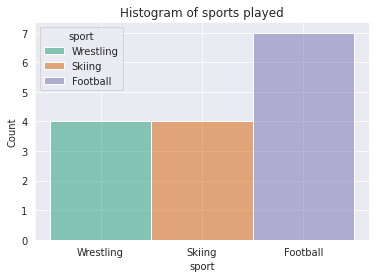

In [ ]:
hist = sns.histplot(data=df, x="sport", hue="sport")

# add a title
plt.title("Histogram of sports played")

# save the plot
plt.savefig("hist_sport.png")

# show the plot in your notebook
plt.show()

We can also plot this distribution by separating male and female players:

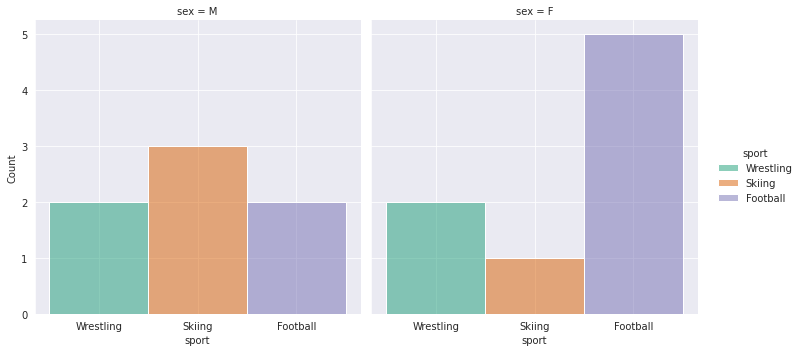

In [ ]:
sns.displot(data=df, x="sport", hue="sport", col="sex")
plt.show()